In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
#import files
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [6]:
#preveiwing the data set
df = pd.read_csv("Dataset.csv")
df.head()

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown


In [12]:
#Data Cleaning
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Clean vaccinated column (replace "unknown" with NaN, then fill with 0)
df['vaccinated'] = pd.to_numeric(df['vaccinated'], errors='coerce')
df['vaccinated'].fillna(0, inplace=True)

# Fill missing new_cases and new_deaths with 0
df['new_cases'].fillna(0, inplace=True)
df['new_deaths'].fillna(0, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 163
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        137 non-null    datetime64[ns]
 1   country     150 non-null    object        
 2   new_cases   150 non-null    float64       
 3   new_deaths  150 non-null    float64       
 4   vaccinated  150 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 7.0+ KB


<ipython-input-12-4bf5121dd66d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vaccinated'].fillna(0, inplace=True)
<ipython-input-12-4bf5121dd66d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [13]:
# Quick look at data types and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 163
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        137 non-null    datetime64[ns]
 1   country     150 non-null    object        
 2   new_cases   150 non-null    float64       
 3   new_deaths  150 non-null    float64       
 4   vaccinated  150 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 7.0+ KB


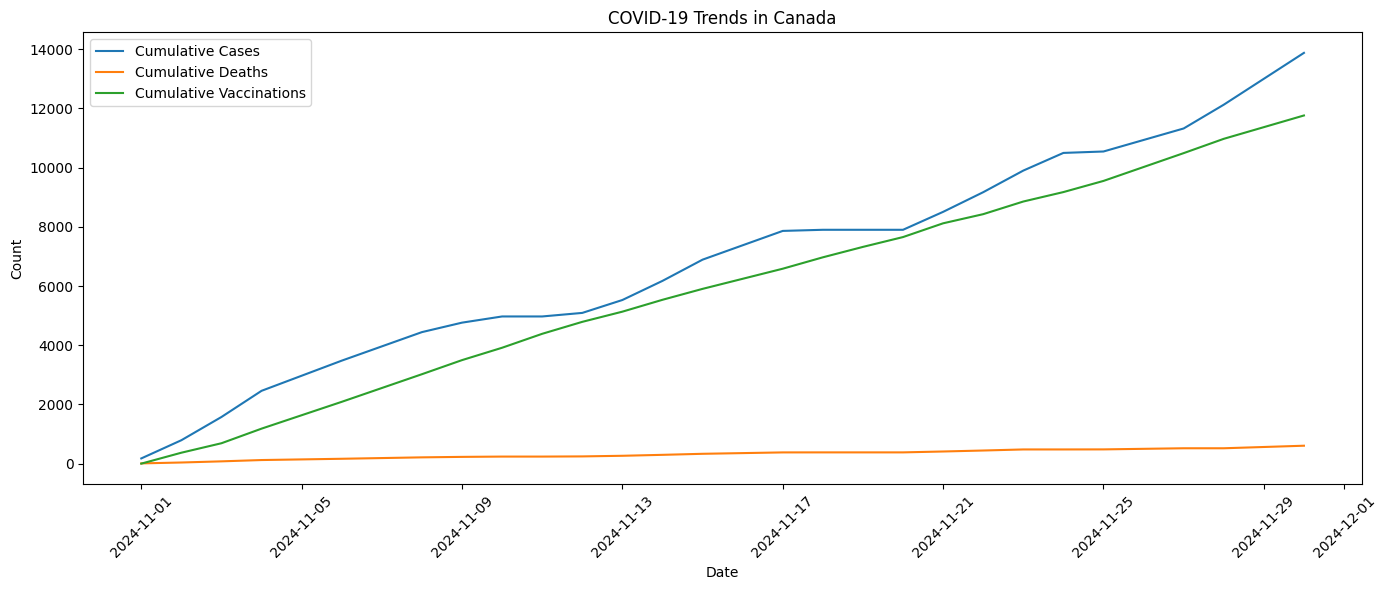

In [19]:
#  Create cumulative columns
df['cumulative_cases'] = df.groupby('country')['new_cases'].cumsum()
df['cumulative_deaths'] = df.groupby('country')['new_deaths'].cumsum()
df['cumulative_vaccinated'] = df.groupby('country')['vaccinated'].cumsum()
df.head()

# Line Plot: COVID-19 Trends in Nigeria
country_focus = "Canada"
df_canada = df[df['country'] == country_focus]

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_canada, x='date', y='cumulative_cases', label='Cumulative Cases')
sns.lineplot(data=df_canada, x='date', y='cumulative_deaths', label='Cumulative Deaths')
sns.lineplot(data=df_canada, x='date', y='cumulative_vaccinated', label='Cumulative Vaccinations')
plt.title(f'COVID-19 Trends in {country_focus}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


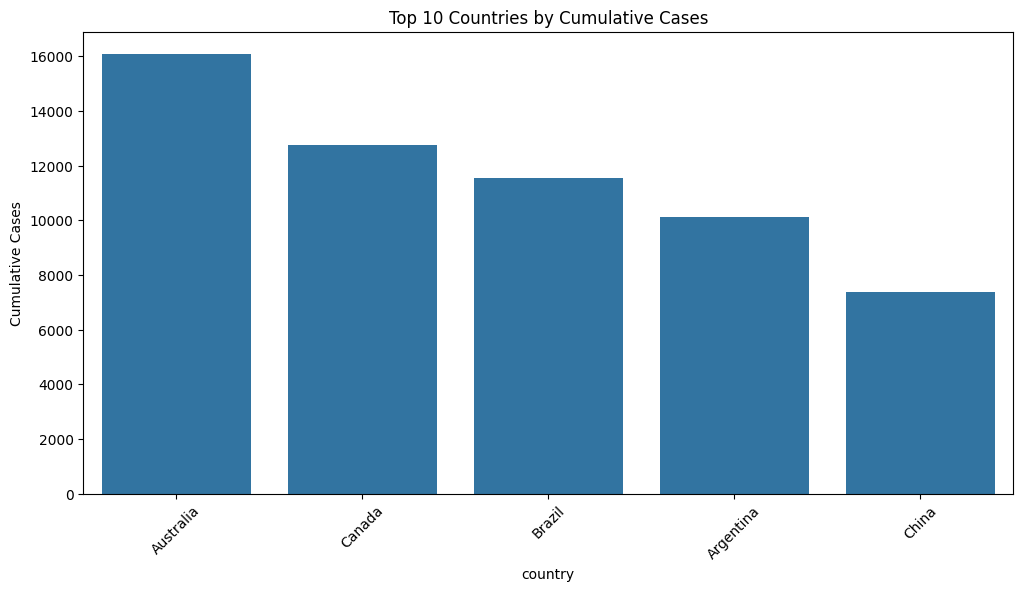

In [18]:
#Bar Chart: Comparison by Country
latest_data = df.sort_values('date').groupby('country').tail(1)
top_countries = latest_data.sort_values('cumulative_cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='country', y='cumulative_cases')
plt.title('Top 10 Countries by Cumulative Cases')
plt.ylabel('Cumulative Cases')
plt.xticks(rotation=45)
plt.show()


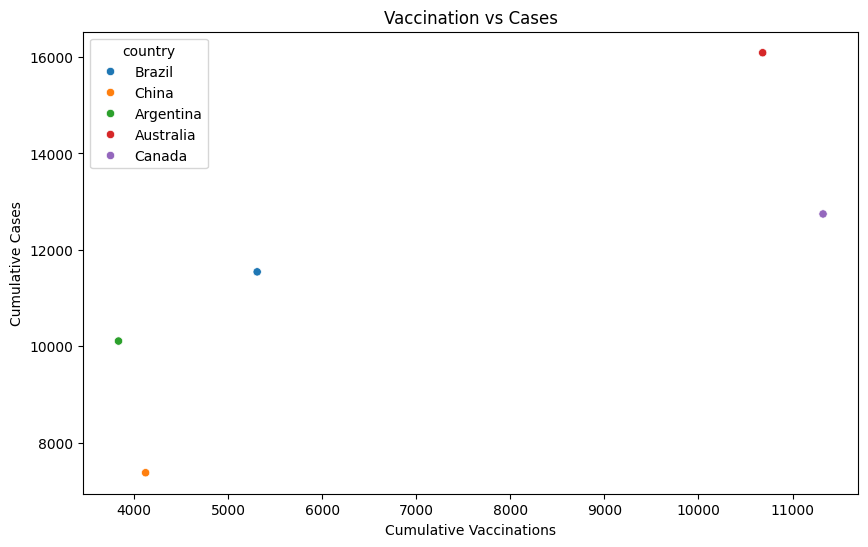

In [20]:
#Scatter Plot: Vaccination vs Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_data, x='cumulative_vaccinated', y='cumulative_cases', hue='country')
plt.title('Vaccination vs Cases')
plt.xlabel('Cumulative Vaccinations')
plt.ylabel('Cumulative Cases')
plt.show()
